In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
corr_Matrix=data.corr()
corr_Matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [8]:
class OLS:
    def __init__(self):
        self.coeff=[0,0]
    
    def train(self, X, y):
        diff_x=X-np.mean(X)
        diff_y=y-np.mean(y)
        self.coeff[1] = sum(diff_x*diff_y)/sum(diff_x*diff_x)
        self.coeff[0] = np.mean(y)-self.coeff[1]*np.mean(X)
        
    def predict(self,X):
        y=self.coeff[0]+self.coeff[1]*X
        return y
    
    def RSS(self,y,y_pred):
        error=y-y_pred
        rss=sum(error*error)
        return rss

1) TV and Sales

In [9]:
X=data['TV']
y=data['Sales']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
model=OLS()
model.train(X_train,y_train)

In [12]:
y_pred=model.predict(y_test)

In [13]:
m=model.coeff[1]
b=model.coeff[0]
m

0.046007789603017185

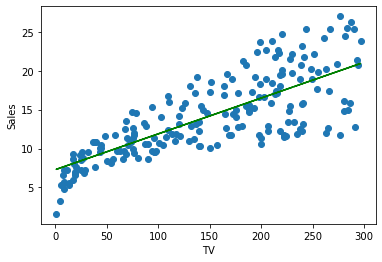

In [14]:
plt.scatter(X,y)
plt.plot(X, b + (m*X),'g-')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [15]:
#calculating error
rss=model.RSS(y_test,y_pred)
rmse=rss/len(y_test)
print('Error: ', rmse)

Error:  57.16396652853105


2) Radio and Sales

In [16]:
X2=data['Radio']

In [17]:
X2_train,X2_test,y_train,y_test=train_test_split(X2,y,test_size=0.2,random_state=0)
model2=OLS()
model2.train(X2_train,y_train)
y_pred2=model2.predict(y_test)

In [18]:
m2=model2.coeff[1]
b2=model2.coeff[0]
m2

0.20651176537911178

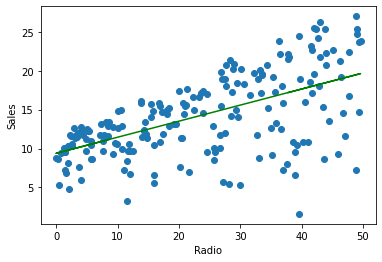

In [19]:
plt.scatter(X2,y)
plt.plot(X2, b2 + (m2*X2),'g-')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

In [20]:
#calculating error
rss2=model2.RSS(y_test,y_pred2)
rmse2=rss2/len(y_test)
print('Error: ', rmse2)

Error:  21.068731505518766


3) Newspaper and Sales

In [21]:
X3=data['Newspaper']

In [22]:
X3_train,X3_test,y_train,y_test=train_test_split(X3,y,test_size=0.2,random_state=0)
model3=OLS()
model3.train(X3_train,y_train)
y_pred3=model3.predict(y_test)

In [23]:
m3=model3.coeff[1]
b3=model3.coeff[0]
m3

0.06030378108276096

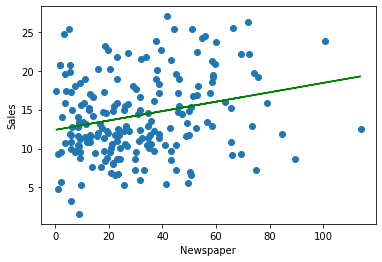

In [24]:
plt.scatter(X3,y)
plt.plot(X3, b3 +(m3*X3), 'g-' )
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

In [25]:
#calculating error
rss3=model3.RSS(y_test,y_pred3)
rmse3=rss3/len(y_test)
print('Error: ', rmse3)

Error:  27.790289949887033
